In [25]:
import numpy as np
from scipy.stats import truncnorm, bernoulli
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

%matplotlib inline
np.random.seed(seed=42)

In [26]:
# Load files
df_raw_counts = pd.read_csv('MID_2_counts.csv')
df_rel_abund = pd.read_csv('MID_2_rel_abund.csv')
df_abs_abund = pd.read_csv('MID_2_abs_abund.csv')

In [27]:
# Define macros
# NUM_SAMPLES = 2
NUM_OTUS = df_rel_abund.shape[0]
# NUM_OTUS = 10
NUM_CLUSTERS = 3
TOTAL_TIME_STEPS = 14
TIME_STEP_SIZE = 0.005
NUM_TIME_POINTS = int(TOTAL_TIME_STEPS/TIME_STEP_SIZE)

In [28]:
# Compute X_k+1 using X_k for a given OTU i
# X_ki, a_i1, a_i2, w_k, w_k_1: Numbers
# b_ij, X_kj: Vectors
def compute_gLV_X_OTU(X_k, a_1, a_2, A, w):
    term_1 = X_k + X_k * (a_1 + a_2 * X_k + A @ X_k) * TIME_STEP_SIZE
    term_2 = w * np.sqrt(TIME_STEP_SIZE)
    
    return term_1 + term_2

85


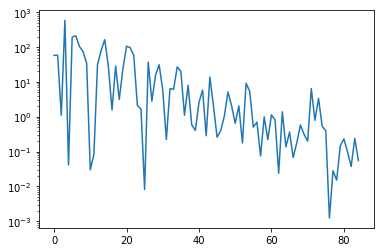

In [34]:
# Find steady states
df_steady_states = df_abs_abund.iloc[:, 73:]

ss_mean = df_steady_states.mean(axis=1).values

ss_mean = ss_mean[ss_mean > 0]
NUM_OTUS = len(ss_mean)
print(NUM_OTUS)
plt.plot(ss_mean)
plt.yscale('log')
plt.show()

# Get self-interactions
self_interactions = -1.0/(ss_mean)
plt.plot(self_interactions)

plt.show()

In [32]:
# Init cluster assignments
# clusters = np.array([[0, 1, 2], [3, 4, 5, 6], [7, 8, 9]])
cluster_assign = KMeans(n_clusters=3, 
                        random_state=42).fit_predict(np.reshape(ss_mean, (-1, 1)))
print(np.unique(cluster_assign, return_counts=True))
otu_idx = np.arange(0, NUM_OTUS, 1)
clusters = list()
reorder_idx = list()
i = 0
for cid in range(NUM_CLUSTERS):
    clusters.append(otu_idx[cluster_assign == cid].tolist())
    reorder_idx.append(otu_idx[i:i + len(clusters[cid])])
    i = i*cid + len(clusters[cid])

print(reorder_idx)

# # Init X and params with constraints for a given sample
# X_init = np.random.uniform(0, 10, (NUM_OTUS,))
# X = np.zeros((NUM_OTUS, NUM_TIME_POINTS))
# X[:, 0] = X_init
# a_1 = truncnorm.rvs(0, 1, size=(NUM_OTUS), random_state=42)
# # a_2 = truncnorm.rvs(-1, 0, size=(NUM_OTUS), random_state=42)
# a_2 = self_interactions
# inter_mat = np.zeros((NUM_OTUS, NUM_OTUS))

# # Init interactions b/w clusters
# i = 0
# for cluster in clusters:
#     target_ids = np.delete(otu_idx, cluster)
#     num_targets = len(target_ids)
#     trunc_a = np.amin(np.absolute(a_2[cluster]))/num_targets
#     sample_trunc = truncnorm.rvs(-trunc_a, trunc_a, 
#                                  size=(1, num_targets), 
#                                  random_state=42)
#     for sidx in cluster:
#         inter_mat[]
# #         inter_mat[sidx, target_ids] = sample_trunc

# # # Reorder
# # i = 0;
# # inter_reord = np.zeros((NUM_OTUS, NUM_OTUS))
# # for cluster in clusters:
# #     cluster_size = len(cluster)
# #     inter_reord[i]

# plt.spy(inter_mat)
# plt.show()
# h1 = sns.heatmap(inter_mat)

# # Init process variance
# w = np.random.normal(0, np.sqrt(0.5), size=(NUM_OTUS, NUM_TIME_POINTS-1))

(array([0, 1, 2], dtype=int32), array([100,   5,   1]))
[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]), array([100, 101, 102, 103, 104]), array([105])]


In [18]:
for t in range(1, NUM_TIME_POINTS):
    X[:, t] = compute_gLV_X_OTU(X[:, t-1], a_1, a_2, inter_mat, w[:, t-1])

/home/suhas/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """
/home/suhas/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in matmul
  """


In [24]:
for otu in otu_idx:
    plt.plot(np.arange(NUM_TIME_POINTS), X[otu, :])
plt.show()

In [26]:
samples_idx = np.arange(0, NUM_TIME_POINTS, 
                        int(NUM_TIME_POINTS/TOTAL_TIME_STEPS), 
                        dtype='int32')

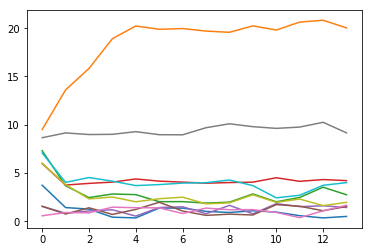

In [27]:
for otu in otu_idx:
    plt.plot(np.arange(TOTAL_TIME_STEPS), X[otu, samples_idx])
plt.show()